In [1]:
#Importing all necessery libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras import backend as K
from keras.models import load_model
import argparse
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras.optimizers import RMSprop


config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))



class myCallback(keras.callbacks.Callback):
	def on_epoch_end(self, epochs,logs={}):
		if(logs.get('acc')>0.90):
			print('\nReached 90% accuracy so cancelling traning!')
			self.model.stop_training = True
	

#Every image in the dataset is of size 224*224
img_width, img_height = 224, 224

train_data_dri = 'v_data/train'
validation_data_dir = 'v_data/test'
nb_train_sample = 400
nb_validation_samples = 100
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)


train_datagen = ImageDataGenerator(rescale=1./255,
									rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
									shear_range = 0.2,
									zoom_range=0.2,
									horizontal_flip=True)

test_datagen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory(
													train_data_dri,
													target_size = (img_width, img_height),
													batch_size=batch_size,
													class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
														validation_data_dir,
														target_size=(img_width,img_height),
														batch_size= batch_size,
														class_mode='binary')


label_map = train_generator.class_indices
print(label_map)



model = Sequential()
model.add(Conv2D(32,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()


model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['acc'])
callbacks = myCallback()
history = model.fit_generator(train_generator,
					steps_per_epoch=nb_train_sample / batch_size,
					epochs = epochs,
					validation_data = validation_generator,
					verbose = 1,
					callbacks = [callbacks])



model.save('model_save1.h5')

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
{'cars': 0, 'planes': 1}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_2 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
___________________________________

/usr/local/lib/python3.5/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


25/25 [==============================] - 19s 742ms/step - loss: 0.7086 - acc: 0.5275 - val_loss: 1.8468 - val_acc: 0.8300
Epoch 2/20
25/25 [==============================] - 16s 642ms/step - loss: 0.6503 - acc: 0.6225 - val_loss: 4.5205 - val_acc: 0.7000
Epoch 3/20
25/25 [==============================] - 16s 635ms/step - loss: 0.5909 - acc: 0.6875 - val_loss: 1.6773 - val_acc: 0.8700
Epoch 4/20
25/25 [==============================] - 17s 670ms/step - loss: 0.5498 - acc: 0.7400 - val_loss: 2.0908 - val_acc: 0.8500
Epoch 5/20
25/25 [==============================] - 16s 658ms/step - loss: 0.5240 - acc: 0.7750 - val_loss: 2.0725 - val_acc: 0.8700
Epoch 6/20
25/25 [==============================] - 16s 634ms/step - loss: 0.5165 - acc: 0.7825 - val_loss: 2.0813 - val_acc: 0.8700
Epoch 7/20
25/25 [==============================] - 17s 698ms/step - loss: 0.4989 - acc: 0.7675 - val_loss: 3.5073 - val_acc: 0.7800
Epoch 8/20
25/25 [==============================] - 17s 672ms/step - loss: 0.511

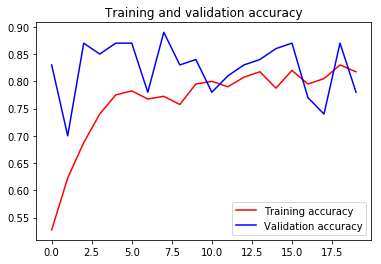

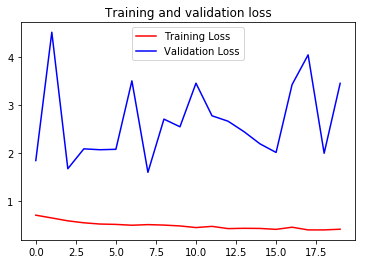

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()